In [1]:
import numpy as np
import random
import math
import spectra
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns; sns.set()
import curveball

A
B
C
D
E
F
G
H


(<Figure size 336x240 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f8108d12b38>)

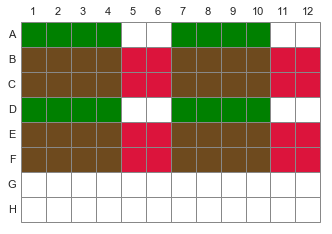

In [2]:
gfp_plate=pd.read_excel("4_8_curveball_plate.xlsx",index_col=0)
plate=pd.DataFrame(columns=['Row','Col','Color','Strain'])
#setting up empty plates 
species_list=['0','GFP',"MC"]
color_dict={'0':"#ffffff", "GFP":'green', "MC":'crimson',"Media":'yellow'}
#colors for each species
for species1 in species_list:
    color_dict[species1]=spectra.html(color_dict[species1])
for species1 in species_list:  
    for species2 in species_list: 
        color_dict[species1+"+"+species2]=color_dict[species1].blend(color_dict[species2], ratio=0.5)
k=1
for ix in gfp_plate.index:
    print(ix)
    j=1
    well=ix
    for element in gfp_plate.loc[ix][0:]:
        
        if element!=element:
            element=0
            plate.loc[k]=[well,j,color_dict[str(element)].hexcode,element]
        elif '+' in element:
            in_well=element.split('+')
            plate.loc[k]=[well,j,color_dict[str(element)].hexcode,element]
        else:
            plate.loc[k]=[well,j,color_dict[str(element)].hexcode,element]
        j+=1
        k+=1
curveball.plots.plot_plate(plate)

In [3]:
exp3=pd.read_csv("4_13_colony_counts.csv")
exp3=exp3.infer_objects()


exp3['total']=exp3["Count_1"]+exp3["Count_2"]
exp3['fraction1']=(exp3["Count_1"]/exp3['total'])
exp3['fraction2']=(exp3["Count_2"]/exp3['total'])
exp3


,Well,Species_1,Species_2,Total Colonies,Count_1,Count_2,total,fraction1,fraction2
0,E11,MC,MC,248,248,0,248,1.000000,0.000000
1,E2,MC,GFP,180,95,85,180,0.527778,0.472222
2,C3,MC,GFP,262,125,137,262,0.477099,0.522901
3,B2,MC,GFP,194,99,95,194,0.510309,0.489691
4,F3,MC,GFP,262,123,139,262,0.469466,0.530534
5,B8,MC,GFP,206,86,120,206,0.417476,0.582524
6,C9,MC,GFP,176,83,93,176,0.471591,0.528409
7,A1,GFP,GFP,267,0,267,267,0.000000,1.000000


Reading worksheet 0 with 265 lines from workbook 4_13_OD.xlsx
[            Time  T° 600 Well     OD
0       0.030000    25.0   A1  0.395
1       0.113333    25.0   A1  0.394
2       0.196667    25.0   A1  0.397
3       0.280000    25.0   A1  0.404
4       0.363333    25.1   A1  0.408
...          ...     ...  ...    ...
25147  21.446667    26.7  H12  0.130
25148  21.530000    26.7  H12  0.130
25149  21.613333    26.7  H12  0.130
25150  21.696667    26.7  H12  0.130
25151  21.780000    26.7  H12  0.130

[25152 rows x 4 columns]] yes
Starting time 0.03
Read 25152 records from workbook


/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


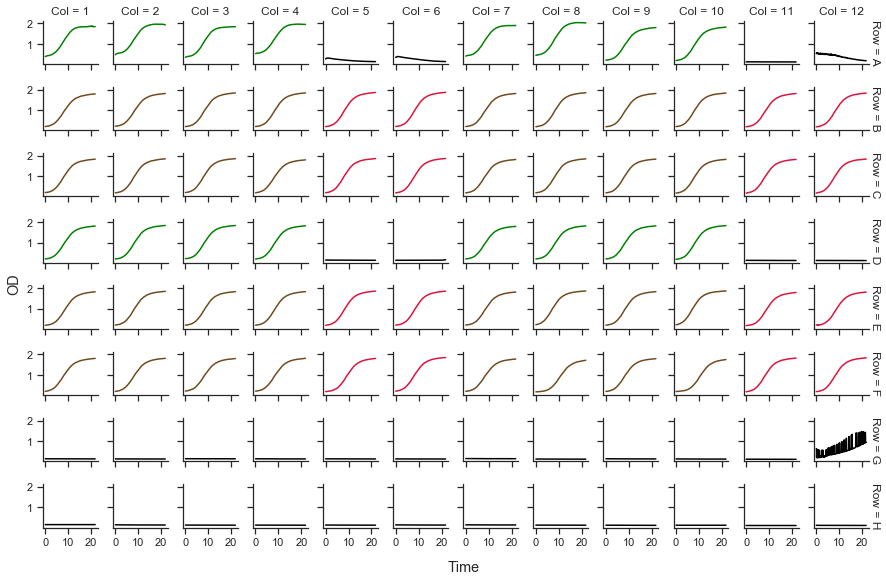

In [4]:
df = curveball.ioutils.read_biotek_xlsx("4_13_OD.xlsx", plate=plate,PRINT=True)
curveball.plots.plot_wells(df)

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


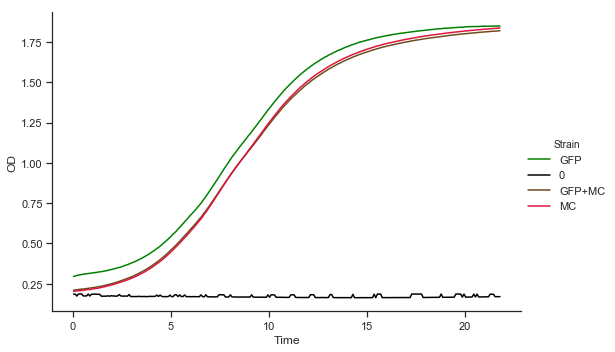

In [5]:
curveball.plots.plot_strains(df)

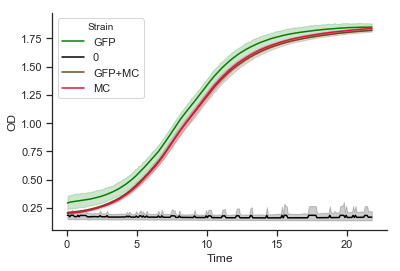

In [6]:
curveball.plots.tsplot(df)

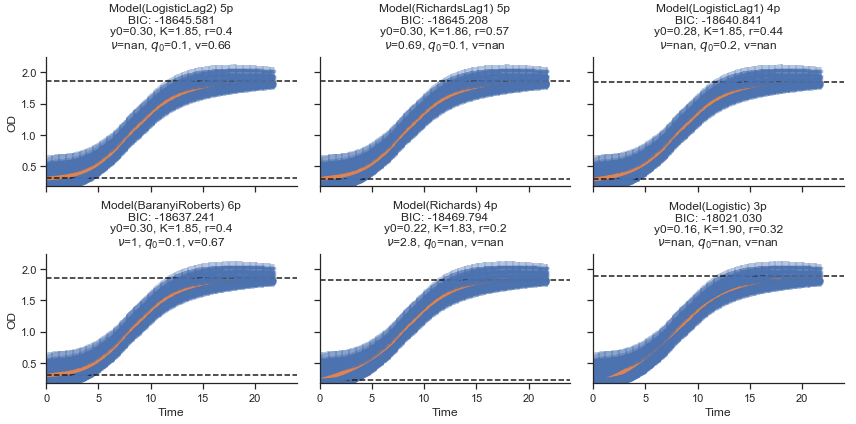

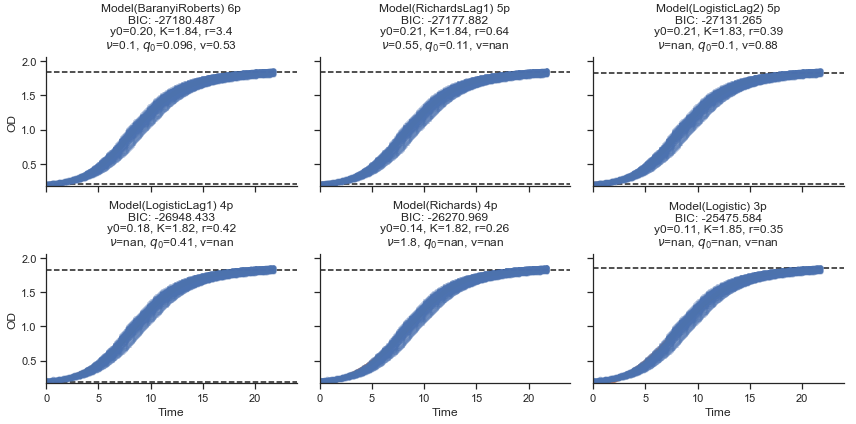

In [7]:
modelsGFP, fig, ax = curveball.models.fit_model(df[df.Strain == 'GFP'], PLOT=True, PRINT=False)
modelsMC, fig, ax = curveball.models.fit_model(df[df.Strain == 'MC'], PLOT=True, PRINT=False)

In [10]:
exp3[exp3.Species_1=="MC"][exp3.Species_2=="GFP"]['fraction1']

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1    0.527778
2    0.477099
3    0.510309
4    0.469466
5    0.417476
6    0.471591
Name: fraction1, dtype: float64

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/curveball/competitions.py:604: RuntimeWarning: invalid value encountered in double_scalars
  dy1dt = r1 * alfa1 * y1 * (1 - (y1**nu1) / (K1**nu1) - a2 * (y2**nu2) / (K1**nu1))
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/curveball/competitions.py:605: RuntimeWarning: invalid value encountered in double_scalars
  dy2dt = r2 * alfa2 * y2 * (1 - a1 * (y1**nu1) / (K2**nu2) - (y2**nu2) / (K2**nu2))


[20, 20, 20, 20, 20, 20] 1 1


/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/curveball/competitions.py:679: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exp_frac1.append(df[df.Species_1==species1][df.Species_2==species2]['fraction1'])
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/curveball/competitions.py:681: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exp_frac2.append(df[df.Species_1==species1][df.Species_2==species2]['fraction2'])


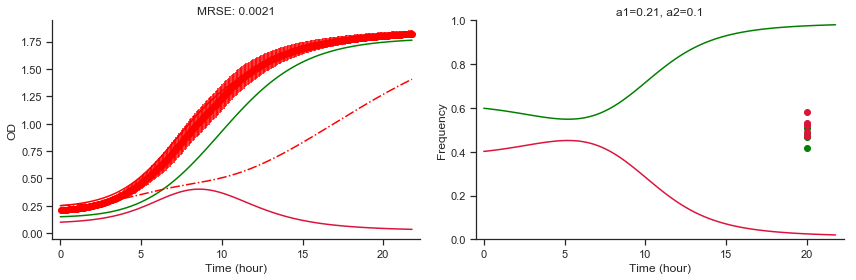

In [8]:
model_dict={}
model_dict["MC"]=modelsMC[0]
model_dict["GFP"]=modelsGFP[0]
species=["GFP","MC"]
fractions=[]
for index1 in range(len(species)):
    bacteria1=species[index1]
    #don't use duplicates 
    for index2 in range(index1,len(species)):
        bacteria2=species[index2]
        #don't use monocultures 
        if bacteria1!=bacteria2:
            b=curveball.competitions.fit_and_compete(model_dict[bacteria1],model_dict[bacteria2],df[df.Strain==bacteria1+"+"+bacteria2],PLOT=True, colors=[color_dict[bacteria1].hexcode,color_dict[bacteria2].hexcode,'red'],df=exp3,species1=bacteria2,species2=bacteria1,exp_time=20)
            frac=b[0][94]
            fractions.append(frac)